### Importing Libraries

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
import dataframe_image as dfi

In [2]:
directory = 'data'
def get_state_data(state_code): 
    ls = []
    ls_for_index = []
    for index, filename in enumerate(os.scandir(directory)):
        if filename.is_file():
            if str(filename.path).startswith(f'data\CoWIN_IN_{state_code}_2021'):
                f = open(filename.path,)
                data = json.load(f)
                ls.append(data)
                ls_for_index.append(' '.join(list(filename.path.split('\\')[1].split('.')[0].split(f'{state_code}_')[1].split('-'))))
    return ls, ls_for_index

In [3]:
def get_state_dfs(state_code):
    ls, ls_for_index = get_state_data(state_code)
    df = pd.DataFrame() 
    df['date-index'] = ls_for_index
    df['date-index'] =  pd.to_datetime(df['date-index'], format='%Y %m %d')
    df.reset_index().set_index('date-index')
    ls_total_sites = []
    for i in range(len(ls)):
        try:
            ls_total_sites.append(ls[i]['topBlock']['sites']['total'])
        except:
            ls_total_sites.append(None)
    df['total_sites'] = ls_total_sites

    ls_govt_sites = []
    for i in range(len(ls)):
        try:
            ls_govt_sites.append(ls[i]['topBlock']['sites']['govt'])
        except:
            ls_govt_sites.append(None)
    df['govt_sites'] = ls_govt_sites

    ls_pvt_sites = []
    for i in range(len(ls)):
        try:
            ls_pvt_sites.append(ls[i]['topBlock']['sites']['pvt'])
        except:
            ls_pvt_sites.append(None)
    df['pvt_sites'] = ls_pvt_sites
    df = df.reset_index(drop=True)

    ls_total_sessions = []
    for i in range(len(ls)):
        try:
            ls_total_sessions.append(ls[i]['topBlock']['sessions']['total'])
        except:
            ls_total_sessions.append(None)
    df['total_sessions'] = ls_total_sessions

    ls_govt_sessions = []
    for i in range(len(ls)):
        try:
            ls_govt_sessions.append(ls[i]['topBlock']['sessions']['govt'])
        except:
            ls_govt_sessions.append(None)
    df['govt_sessions'] = ls_govt_sessions

    ls_pvt_sessions = []
    for i in range(len(ls)):
        try:
            ls_pvt_sessions.append(ls[i]['topBlock']['sessions']['pvt'])
        except:
            ls_pvt_sessions.append(None)
    df['pvt_sessions'] = ls_pvt_sessions

    ls_total_vaccine_cumulative = []
    for i in range(len(ls)):
        try:
            ls_total_vaccine_cumulative.append(ls[i]['topBlock']['vaccination']['total'])
        except:
            ls_total_vaccine_cumulative.append(None)
    df['total_vacc_cumulative'] = ls_total_vaccine_cumulative

    ls_vac_male = []
    for i in range(len(ls)):
        try:
            ls_vac_male.append(ls[i]['topBlock']['vaccination']['male'])
        except:
            ls_vac_male.append(None)
    df['vacc_male'] = ls_vac_male

    ls_vac_female = []
    for i in range(len(ls)):
        try:
            ls_vac_female.append(ls[i]['topBlock']['vaccination']['female'])
        except:
            ls_vac_female.append(None)
    df['vacc_female'] = ls_vac_female
    
    ls_vac_others = []
    for i in range(len(ls)):
        try:
            ls_vac_others.append(ls[i]['topBlock']['vaccination']['others'])
        except:
            ls_vac_others.append(None)
    df['vacc_others'] = ls_vac_others

    ls_covishield = []
    for i in range(len(ls)):
        try:
            ls_covishield.append(ls[i]['topBlock']['vaccination']['covishield'])
        except:
            ls_covishield.append(None)
    df['covishield'] = ls_covishield
    
    ls_covaxin = []
    for i in range(len(ls)):
        try:
            ls_covaxin.append(ls[i]['topBlock']['vaccination']['covaxin'])
        except:
            ls_covaxin.append(None)
    df['covaxin'] = ls_covaxin
    
    ls_today = []
    for i in range(len(ls)):
        try:
            ls_today.append(ls[i]['topBlock']['vaccination']['today'])
        except:
            ls_today.append(None)
    df['today'] = ls_today
    
    ls_total_dose_1 = []
    for i in range(len(ls)):
        try:
            ls_total_dose_1.append(ls[i]['topBlock']['vaccination']['tot_dose_1'])
        except:
            ls_total_dose_1.append(None)
    df['total_dose_1'] = ls_total_dose_1
    
    ls_total_dose_2 = []
    for i in range(len(ls)):
        try:
            ls_total_dose_2.append(ls[i]['topBlock']['vaccination']['tot_dose_2'])
        except:
            ls_total_dose_2.append(None)
    df['total_dose_2'] = ls_total_dose_2
    
    ls_total_doses = []
    for i in range(len(ls)):
        try:
            ls_total_doses.append(ls[i]['topBlock']['vaccination']['total_doses'])
        except:
            ls_total_doses.append(None)
    df['total_doses'] = ls_total_doses
    
    ls_district_id = []
    ls_id = []
    ls_title = []
    ls_district_name = []
    ls_vacc_district = []
    ls_total_vacc_district = []
    ls_partial_vacc_district = []
    df_district = pd.DataFrame() 
    for i in range(len(ls)):
        for j in range(len((ls[i]['getBeneficiariesGroupBy']))):
            try:
                ls_district_id.append(ls[i]['getBeneficiariesGroupBy'][j]['district_id'])
            except:
                ls_district_id.append(None)
            try:
                ls_id.append(ls[i]['getBeneficiariesGroupBy'][j]['id'])
            except:
                ls_id.append(None)
            try:
                ls_title.append(ls[i]['getBeneficiariesGroupBy'][j]['title'])
            except:
                ls_title.append(None)   
            try:
                ls_district_name.append(ls[i]['getBeneficiariesGroupBy'][j]['district_name'])
            except:
                ls_district_name.append(None)   
            try:
                ls_vacc_district.append(ls[i]['getBeneficiariesGroupBy'][j]['total'])
            except:
                ls_vacc_district.append(None)   
            try:
                ls_total_vacc_district.append(ls[i]['getBeneficiariesGroupBy'][j]['totally_vaccinated'])
            except:
                ls_total_vacc_district.append(None)   
            try:
                ls_partial_vacc_district.append(ls[i]['getBeneficiariesGroupBy'][j]['partial_vaccinated'])
            except:
                ls_partial_vacc_district.append(None)  
    df_district['district_id'] = ls_district_id
    df_district['id'] = ls_id
    df_district['title'] = ls_title
    df_district['district_name'] = ls_district_name
    df_district['vaccinatated_in_district_partial_and_total'] = ls_vacc_district
    df_district['vaccinatated_in_district_total'] = ls_total_vacc_district
    df_district['vaccinatated_in_district_partial'] = ls_partial_vacc_district
    return df, df_district

In [4]:
df, df_district = get_state_dfs(16)
ls, ls_index = get_state_data(16)

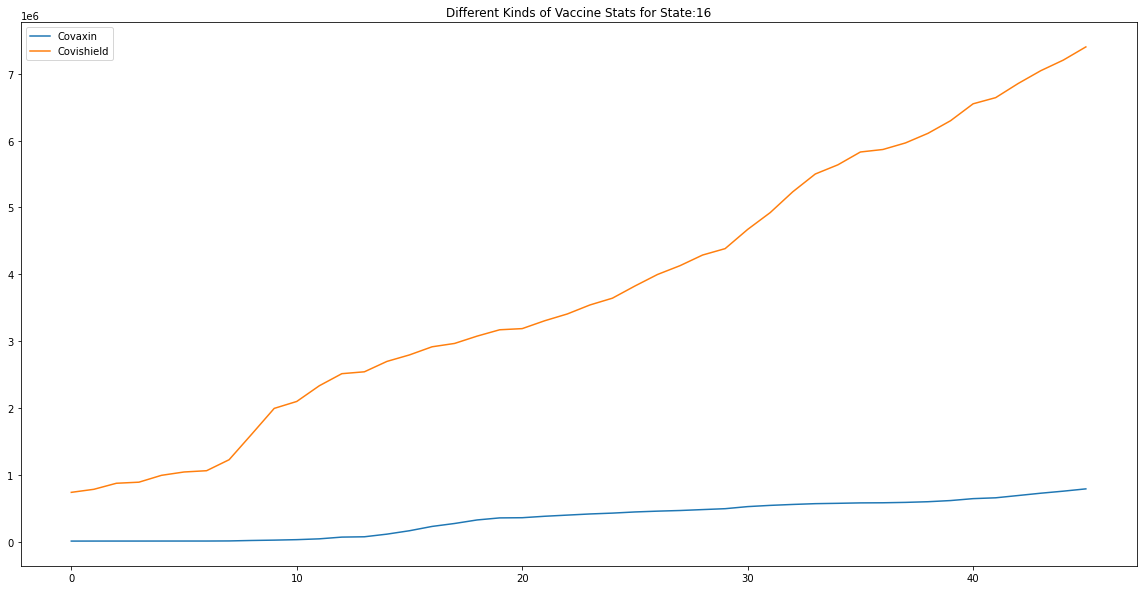

In [5]:
def get_district_changes(district_code, state_code):
    df, df_district = get_state_dfs(state_code)
    df_some_district = df_district.loc[df_district['district_id'] == district_code]
    dfi.export(df_some_district,f"datatable_{state_code}_{district_code}.png")
    return df_some_district

def plot_district_changes(district_code, state_code):
    plt.figure(figsize=(20,10))
    df_some_district = get_district_changes(district_code, state_code)
    plt.plot(df_some_district['vaccinatated_in_district_partial_and_total'], label = 'All Vaccinations')
    plt.plot(df_some_district['vaccinatated_in_district_total'], label = 'Completed Vaccinations')
    plt.plot(df_some_district['vaccinatated_in_district_partial'], label = 'Partial Vaccinations')
    plt.legend()
    plt.title(f'Vaccination Curves for District Number {district_code}')
    plt.savefig(f'district_changes_{district_code}_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
    
def plot_genderwise_state(state_code):
    df, df_district = get_state_dfs(state_code)
    plt.figure(figsize=(20,10))
    plt.plot(df['vacc_male'], label = 'Male Vaccination')
    plt.plot(df['vacc_female'], label = 'Female Vaccinations')
    plt.plot(df['vacc_others'], label = 'Other Vaccinations')
    plt.title(f'Gender Wise Stats for State:{state_code}')
    plt.legend()
    plt.savefig(f'genderwise_state_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)

def plot_dosewise_state(state_code):
    df, df_district = get_state_dfs(state_code)
    plt.figure(figsize=(20,10))
    plt.plot(df['total_dose_1'], label = 'Total Dose 1')
    plt.plot(df['total_dose_2'], label = 'Total Dose 2')
    plt.plot(df['total_doses'], label = 'Total Doses')
    plt.legend()
    plt.title(f'Dose Wise Stats for State:{state_code}')
    plt.savefig(f'dosewise_state_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
def plot_site_stats(state_code):
    plt.figure(figsize=(20,10))
    df, df_district = get_state_dfs(state_code)
    plt.plot(df['total_sites'], label = 'Total Sites')
    plt.plot(df['govt_sites'], label = 'Government Sites')
    plt.plot(df['pvt_sites'], label = 'Private Sites')
    plt.legend()
    plt.title(f'Site wise Stats for State:{state_code}')
    plt.savefig(f'site_stats_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
def plot_diff_vacc(state_code):
    plt.figure(figsize=(20,10))
    df, df_district = get_state_dfs(state_code)
    plt.plot(df['covaxin'], label = 'Covaxin')
    plt.plot(df['covishield'], label = 'Covishield')
    plt.legend()
    plt.title(f'Different Kinds of Vaccine Stats for State:{state_code}')
    plt.savefig(f'diff_vaccine_stats_{state_code}.png', bbox_inches = 'tight',
    pad_inches = 2)
    
plot_diff_vacc(16)

In [6]:
ls

[{'topBlock': {'sites': {'total': 2691,
    'govt': 2331,
    'pvt': 360,
    'today': None},
   'sessions': {'total': 331650, 'govt': 274450, 'pvt': 57200, 'today': None},
   'registration': {'total': None,
    'male': None,
    'female': None,
    'others': None,
    'today': None},
   'vaccination': {'total': 743007,
    'male': 341256,
    'female': 401647,
    'others': 104,
    'covishield': 736102,
    'covaxin': 6852,
    'today': 63344}},
  'vaccinationDoneByTime': [{'ts': '2021-03-08T06:00:00.000Z',
    'timestamps': '2021-03-08T12:00:00.000Z',
    'label': '12:00-13:00',
    'count': 8364,
    'dose_one': 6263,
    'dose_two': 2101},
   {'ts': '2021-03-08T08:00:00.000Z',
    'timestamps': '2021-03-08T14:00:00.000Z',
    'label': '14:00-15:00',
    'count': 9066,
    'dose_one': 6539,
    'dose_two': 2527},
   {'ts': '2021-03-08T10:00:00.000Z',
    'timestamps': '2021-03-08T16:00:00.000Z',
    'label': '16:00-17:00',
    'count': 9476,
    'dose_one': 6036,
    'dose_two': 34

In [7]:
def prep_for_pdf(state_code, district_code):
    WIDTH = 210
    HEIGHT = 297
    pdf = FPDF()
    pdf.add_page()
    pdf.ln(60)
    pdf.set_font('Arial', 'B', 16)
    pdf.write(25, f'COVID Vaccine Analysis Report for State: {state_code}, District: {district_code}')
    pdf.ln(20)
    pdf.write(5, '''This report analyzes the following:
              - The Number of Site Statistics for the State
              - Gender Wise Vaccination Distribution in the State
              - Dose Wise Statistics for the State
              - Statistics for Different Kinds of Vaccine in the State
              - Number of Vaccinations in the District
              - Data Table for the Vaccination Trends in the District
              ''')
    pdf.ln(40)
    pdf.add_page()
    get_district_changes(district_code, state_code)
    plot_district_changes(district_code, state_code)
    plot_genderwise_state(state_code)
    plot_dosewise_state(state_code)
    plot_site_stats(state_code)
    plot_diff_vacc(state_code)
    pdf.image(f'site_stats_{state_code}.png',5, 10, WIDTH-10)
    pdf.image(f'genderwise_state_{state_code}.png',5, 120, WIDTH-10)
    pdf.add_page()
    pdf.image(f'dosewise_state_{state_code}.png',5, 10, WIDTH-10)
    pdf.image(f'diff_vaccine_stats_{state_code}.png',5, 120, WIDTH-10)
    pdf.add_page()
    pdf.image(f'district_changes_{district_code}_{state_code}.png',5, 10, WIDTH-10)
    pdf.add_page()
    pdf.image(f'datatable_{state_code}_{district_code}.png',5,10, 200)
    pdf.output(f'State_{state_code}_district_{district_code}' + '.pdf')

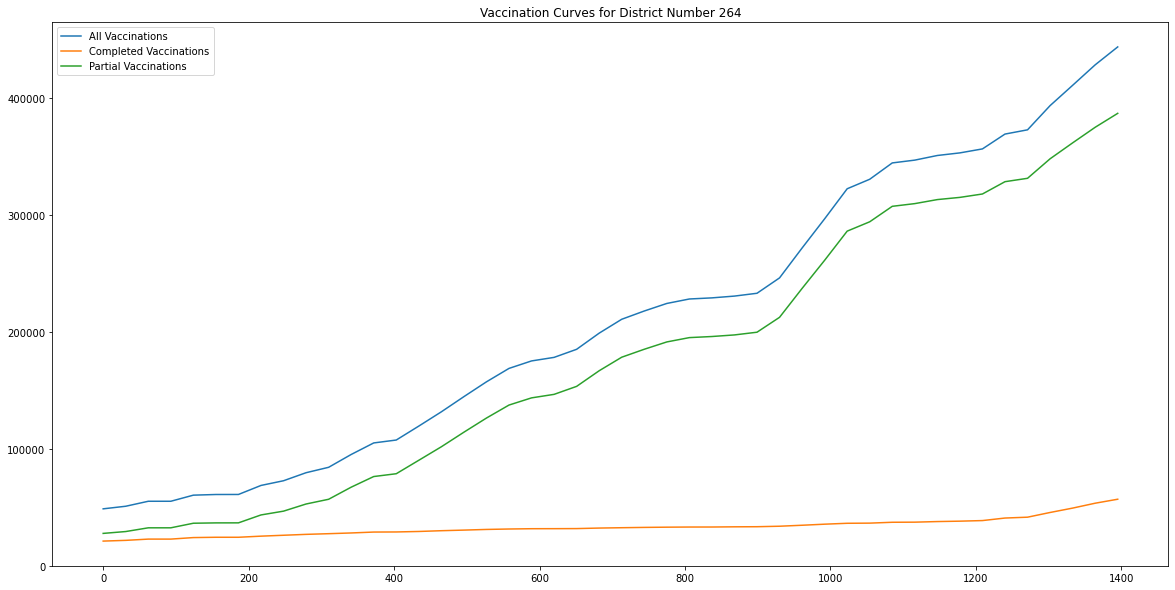

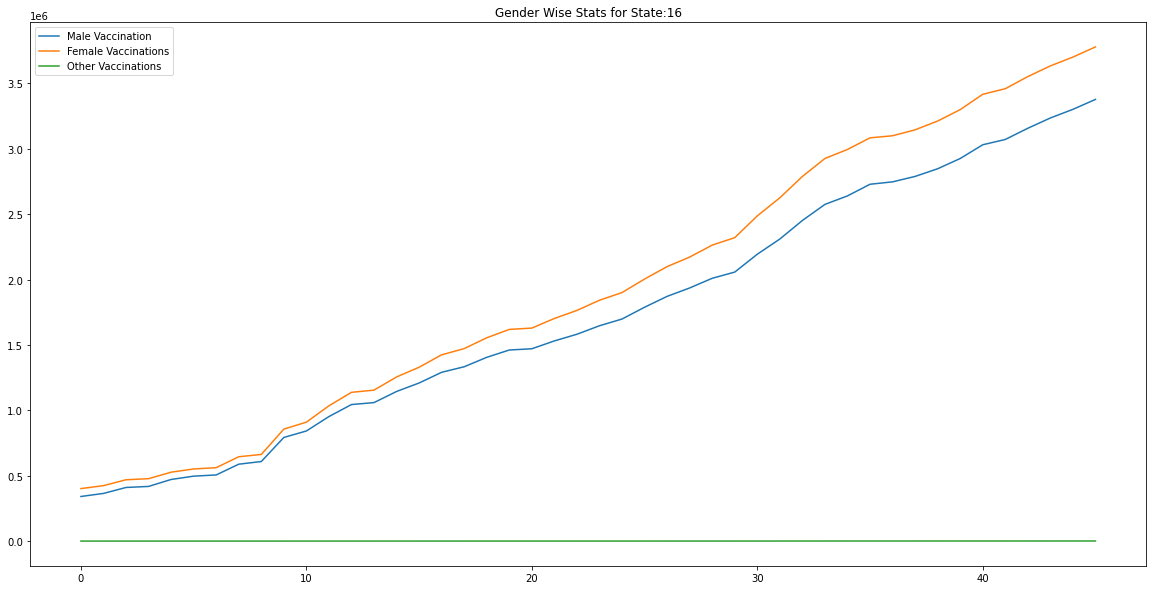

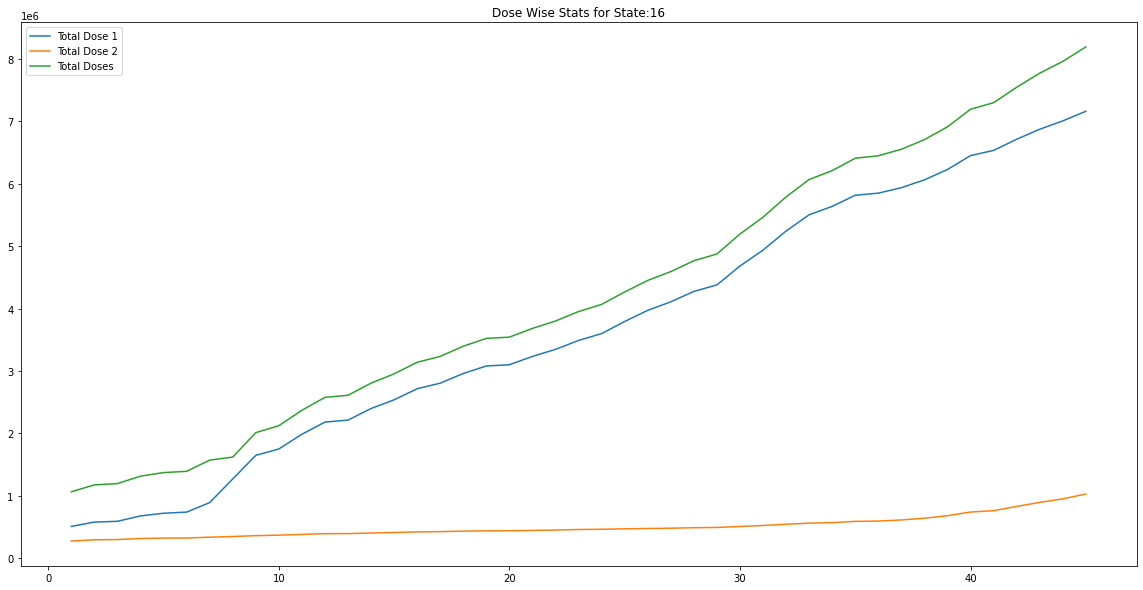

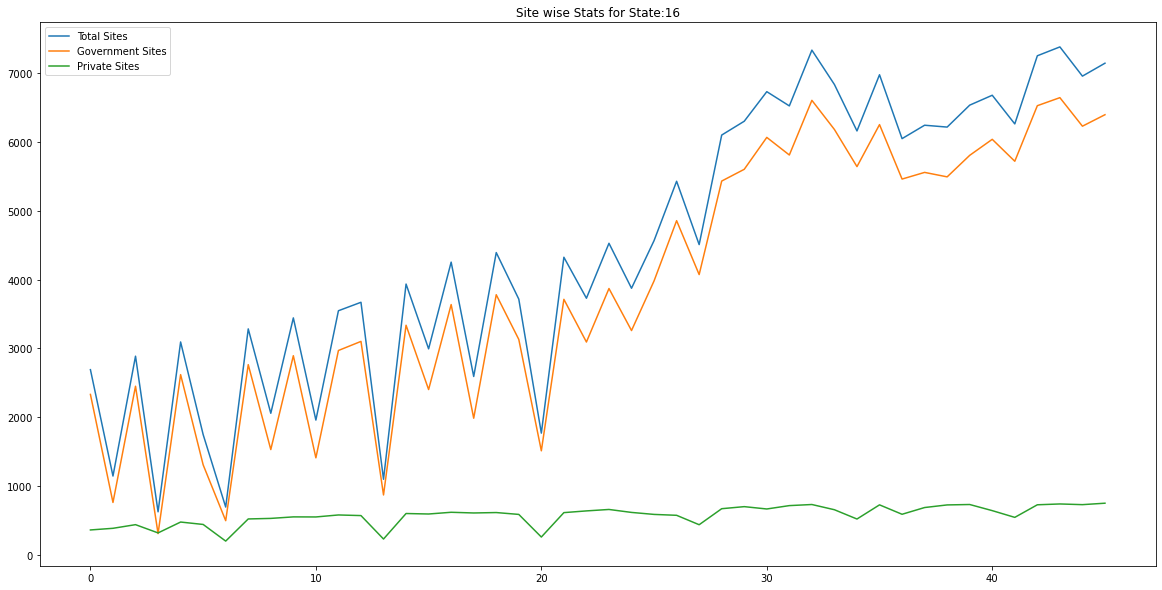

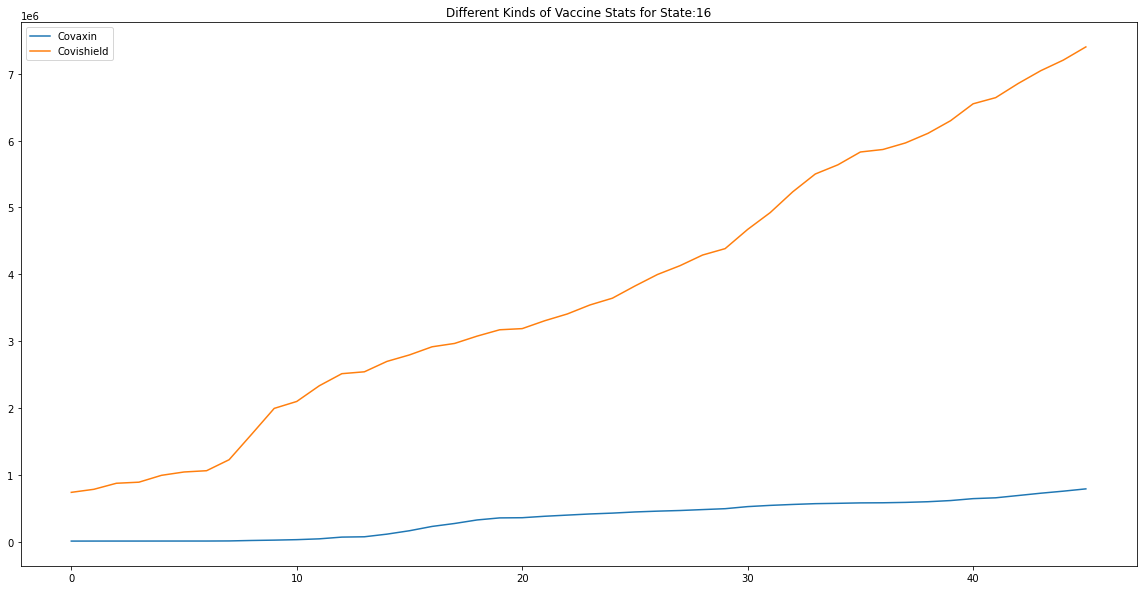

In [8]:
prep_for_pdf(16, 264)